## Download word2vec pretrained vectors

In [1]:
%%time
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

CPU times: user 41.1 s, sys: 4.13 s, total: 45.2 s
Wall time: 46.6 s


### A word is represented as a 300 dimensional vector

In [2]:
model['delicious'].shape

(300,)

In [3]:
model['delicious']

array([-0.18164062, -0.1328125 ,  0.0390625 ,  0.31445312,  0.01806641,
        0.09179688,  0.19140625,  0.02722168, -0.18359375,  0.30664062,
       -0.20605469, -0.14550781,  0.09130859,  0.02185059,  0.03540039,
        0.38085938,  0.06494141, -0.06884766,  0.02490234,  0.05151367,
        0.0213623 ,  0.30859375,  0.25976562,  0.00744629,  0.0222168 ,
       -0.29882812, -0.03125   ,  0.17578125, -0.03637695,  0.02099609,
       -0.11523438,  0.00415039,  0.22558594,  0.171875  , -0.19433594,
        0.01647949,  0.24902344, -0.29296875, -0.03930664,  0.24316406,
        0.05126953, -0.17382812,  0.08789062, -0.08203125,  0.02941895,
       -0.29101562, -0.05224609,  0.37890625,  0.16113281,  0.17480469,
       -0.04370117,  0.19628906,  0.01696777,  0.12207031, -0.18554688,
       -0.05834961,  0.15917969, -0.17773438, -0.11767578, -0.14453125,
       -0.17480469,  0.11669922, -0.09863281,  0.03088379,  0.20117188,
       -0.20507812, -0.0859375 , -0.3515625 ,  0.03295898,  0.10

### Words that appear in similar contexts have a small distance

In [4]:
model.distance('manager', 'director')

0.33363431692123413

### Words that appear in dissimilar contexts have a large distance

In [5]:
model.distance('math', 'romance')

0.8854579925537109

## Clustering Words

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
words = ['france', 'spain', 'germany', 'italy',
         'director', 'ceo', 'executive', 'manager',
         'shirt', 'pants', 'sweater', 'hat',
         'congress', 'law', 'representatives', 'judge']

### Convert words to their 300 dimensional representation

In [8]:
word_vectors_300d = np.array([model[word] for word in words])

### "Project" 300 dimensions into 2D to make it easy to visualize

In [9]:
word_vectors_2d = PCA(n_components=2).fit_transform(word_vectors_300d)

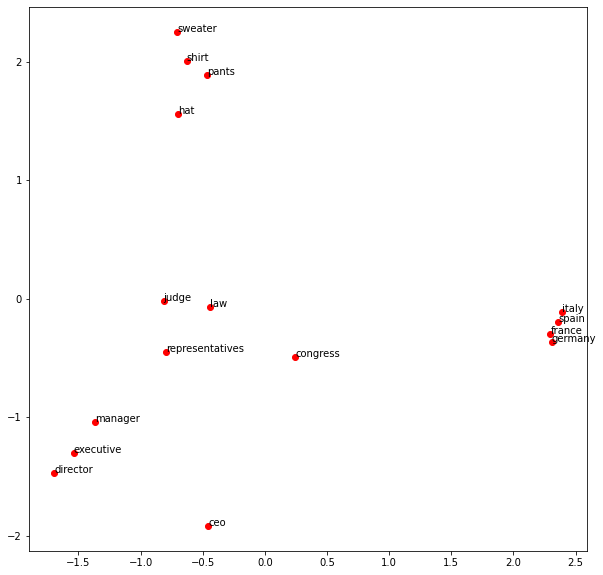

In [10]:
plt.figure(figsize=(10, 10))

for i in range(len(words)):
    x = word_vectors_2d[i][0]
    y = word_vectors_2d[i][1]
    plt.plot(x, y, 'ro')
    plt.text(x, y, words[i])